Title: Age, Blood Cholesterol, and Resting Blood Pressure in Predicting Heart Disease

Introduction: 

Heart disease is a common illness that is influenced by various factors. For example, high blood could lead to damage of the artery due to increased flow of blood over time (Mayo Clinic, 2023). High Blood Cholesterol could also be a risk factor (Mozaffarian et al., 2015). Also, older age is related to more prevalence of high blood pressure, as well as heart disease itself (Mozaffarian et al., 2015). 

The current analysis aims to investigate whether age, blood cholesterol, and blood pressure together would predict heart disease.

The database used is the Cleveland database from the heart disease database stored in the UC Irvine Machine Learning Repository. It contains 14 attributes with 303 rows (Dua & Graff, 2017). The variables (columns) are:
1. age
2. sex: (1 = male, 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (mmHg)
5. chol: serum cholesterol (mg/dl)
6. fbs: fasting blood sugar > 120 mg/dl (1 = True, 0 = False)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = True, 0 = False)
10. oldpeak: ST depression induced by exercise, relative to rest
11. slope: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. ca: number of major vessels (0-3) colored by fluoroscopy
13. thal: (3 = normal, 6 = fixed defect, 7 = reversible defect)
14. num: diagnosis of heart disease (0 = no presence, 1-4 = severity)ve)?



In [1]:
#Preliminary exploratory data analysis:
# libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# read data

cleveland <- read_csv("https://raw.githubusercontent.com/zoed2002/DATA100_project_Emma-Zoe/main/data/heart_disease/processed.cleveland.data", 
                        col_names = c("age", "sex", "cp", "trestbps","chol","fbs","restecg","thalach", "exang", "oldpeak", 
                       "slope", "ca","thal","num"))
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [3]:
cleveland_clean <- cleveland |> 
# filter out all the ? in each column
    filter(age != "?") |> filter(sex != "?") |>
    filter(cp != "?") |>filter(trestbps != "?") |> filter(chol != "?") |>
    filter(fbs != "?") |>filter(restecg != "?") |> filter(thalach != "?") |>
    filter(	exang != "?") |>filter(oldpeak != "?") |>filter(slope != "?") |>
    filter(ca != "?") |>filter(thal != "?") |>filter(num != "?") |> 
# turn catagorical variables from dbl to factors
    mutate(age = as.integer(age), sex = as.factor(sex), cp = as.factor(cp), 
                           fbs = as.factor(fbs), restecg = as.factor(restecg),    
                           exang = as.factor(exang), slope=as.factor(slope), 
                           ca = as.integer(ca), trestbps	= as.integer(trestbps),
                           thalach = as.integer(thalach),
                           chol = as.integer(chol),thal = as.factor(as.integer(thal)))|> 
# turn num to catagorical variable that indicates having heart disease(1) or not(0)
    mutate(num = ifelse(num > 0, 1, 0)) |> mutate(num = as.factor(num))

cleveland_clean

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7,1


In [4]:
#splitting
cleveland_split <- initial_split(cleveland_clean, prop = 3/4, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)                       

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0


In [5]:
#summary
summary <- cleveland_training %>%
                    group_by(num) %>%
                    summarize(min_age = min(age), max_age = max(age), mean_age = mean(age),
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                              count = n()) 
summary

num,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_trestbps,max_trestbps,mean_trestbps,count
<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
0,29,76,52.65833,126,417,242.3667,94,180,129.1750,120
1,35,77,56.72549,131,409,250.3333,100,192,134.1765,102


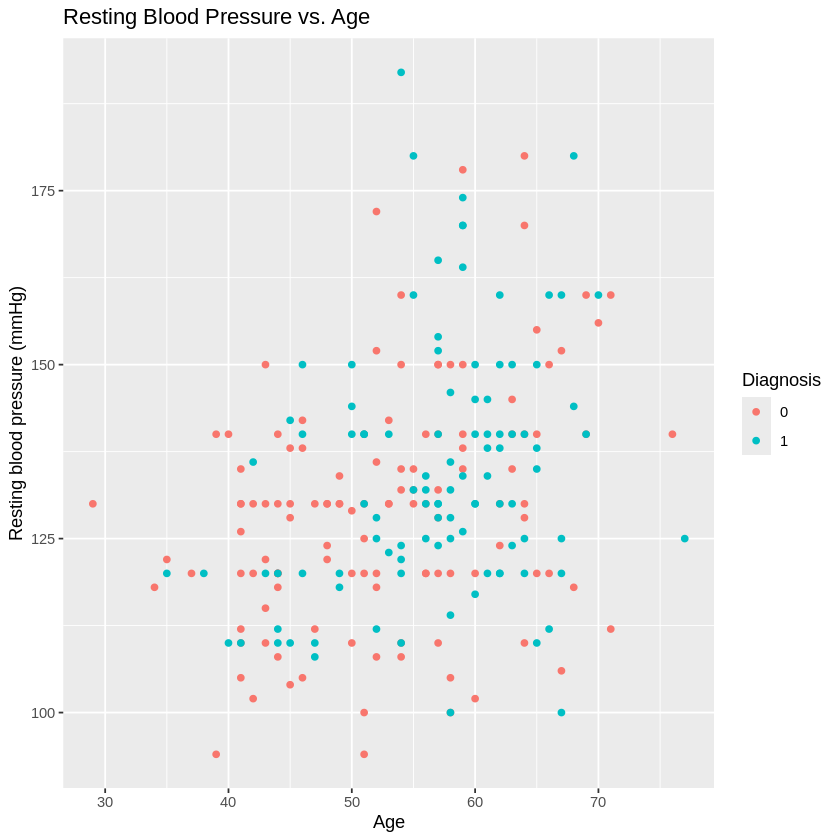

`geom_smooth()` using formula = 'y ~ x'


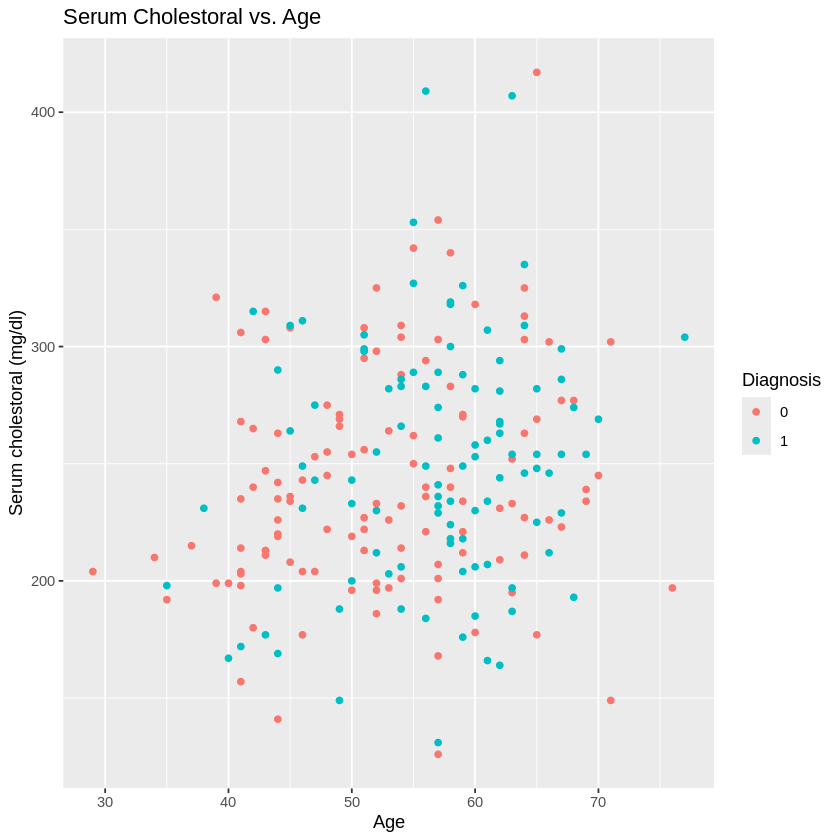

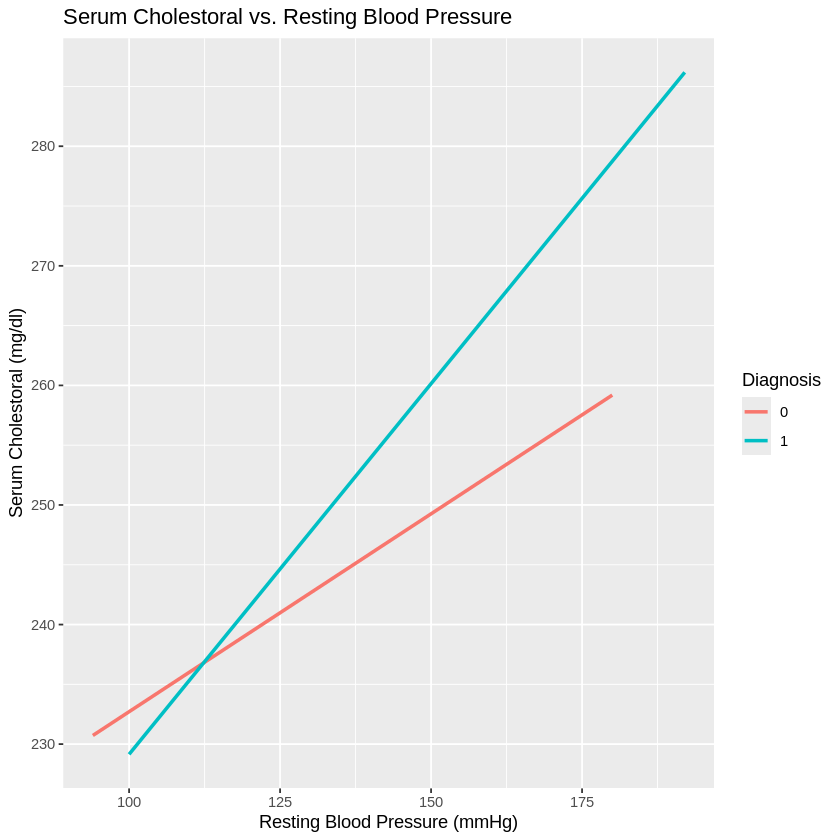

In [6]:
#visualize training data

plot1 <- ggplot(cleveland_training, aes(x = age, y = trestbps, color = num)) +
                 geom_point() +
               
                 labs(title = "Resting Blood Pressure vs. Age", x = "Age", y = "Resting blood pressure (mmHg)", color = "Diagnosis")
                 
plot2 <- ggplot(cleveland_training, aes(x = age, y = chol, color = num)) +
                 geom_point() +
                 labs(title = "Serum Cholestoral vs. Age", x = "Age", y = "Serum cholestoral (mg/dl)", color = "Diagnosis")
                 
plot3 <- ggplot(cleveland_training, aes(x = trestbps, y = chol, color = num)) +
                 geom_smooth(method = "lm", se = FALSE) +
                 labs(title = "Serum Cholestoral vs. Resting Blood Pressure", x = "Resting Blood Pressure (mmHg)", y = "Serum Cholestoral (mg/dl)", color = "Diagnosis")  

plot1
plot2
plot3

Method:

    To clean the data, we first excluded rows that contain unknown cells (?). Since we are only interested in classifying heart disease or no heart disease regardless of severity, the “num” column was converted to a factor variable (0 = no heart disease, 1 = heart disease). 

    The cleaned data was then separated into a training (75%) and testing (25%) set, stratifying for “num”. The Preliminary exploratory data analysis used the training data only. 

    Then, the minimum, maximum, and mean values of age, resting blood pressure, and serum cholesterol of patients with and without a diagnosis of heart disease were summarized in a table.

    To visualize the dataset, we plotted three graphs. The first graph explores the distribution of resting blood pressure levels among people of different ages. The second graph shows the distribution of serum cholesterol among different ages. The third graph compares the relationship between resting blood pressure and serum cholesterol for people with and without heart disease.

    The visualization shows that both serum cholesterol and resting blood pressure increase slightly with age (among people with and without heart disease). Also, there seem to be slightly more diagnosed patients with older age. Furthermore, the relationship between serum cholesterol and resting blood pressure is different between patients with heart disease and those who do not. This informs us about the possible predictive properties of the three features we pick, as well as their dynamic interactions. Therefore, we have decided to further test whether age, resting blood pressure, and serum cholesterol can together accurately predict a diagnosis of heart disease. 
    
    We will be using columns 2 (sex), 4 (trestbps), 5(chol), and 14 (num). Among these columns, columns 2, 4, and 5 are patient features used for predicting the target variable (column 14) (refer to the introduction for the description of each column).






Expected outcomes and significance:
    
    We expect to find that patients with high cholesterol, combined with high resting blood pressure and old age will accurately predict the presence of heart disease using our classification system. 
    
    Such findings could function as a useful source that informs the doctor about the role of different factors when making a diagnosis, such that the diagnosis will be more accurate.

    In the future, preventive questions like “What features should be considered when we try to reduce the probability of having a heart disease?” can be asked. Also, in order to generalize the result, we can explore how the features might influence heart disease diagnosis in different races and whether there will be a sex difference.umn).


Citations:

Mayo Clinic Staff. (2023). High blood pressure. Mayo Clinic. Retrieved from https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868

Mozaffarian, D., Benjamin, E. J., Go, A. S., Arnett, D. K., Blaha, M. J., Cushman, M., de Ferranti, S., Després, J., Fullerton, H. J., Howard, V. J., Huffman, M. D., Judd, S. E., Kissela, B. M., Lackland, D. T., Lichtman, J. H., Lisabeth, L. D., Liu, S., Mackey, R. H., Matchar, D. B., . . . American Heart Association Statistics Committee and Stroke Statistics Subcommittee. (2015). Heart disease and stroke Statistics—2015 update: A report from the american heart association. Circulation (New York, N.Y.), 131(4), e29-e322. https://doi.org/10.1161/CIR.0000000000000152

Dua, D., & Graff, C. (2017). UCI Machine Learning Repository. [Dataset] Retrieved from https://archive.ics.uci.edu/ml/datasets/heart+disease

